In [1]:
from udma import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cb=UDMA("192.168.1.10", 7)
cb.connect()

1

In [3]:
# Select comblock
# cb.log(1)
cb.select_comblock(0)

[(1, 0), 0]

In [4]:
# Reset HiCCE
cb.write_reg(5, 0) #RESET ON
cb.write_reg(5, 1) #RESET OFF

[(1, 0), 0]

In [18]:
#Disable Acquisiton 
cb.write_reg(4, 0)

[(1, 0), 0]

In [19]:
# FIFO Clear
cb.write_reg(33, 1)
cb.write_reg(33, 0)

[(1, 0), 0]

In [20]:
# Configure INTANT (Reset Counter)
cb.write_reg(0, 6150)
cb.write_reg(1, 6150)
cb.write_reg(2, 6150)
cb.write_reg(3, 6150)

[(1, 0), 0]

In [21]:
# Configure INTANT (Cyclic Read)
cb.write_reg(0, 6182)
cb.write_reg(1, 6182)
cb.write_reg(2, 6182)
cb.write_reg(3, 6182)

[(1, 0), 0]

In [22]:
# Configure INTANT (Enable Acquisition)
cb.write_reg(4, 15)

[(1, 0), 0]

In [9]:
#Data Request


In [23]:
#Collect Data
data = cb.read_fifo(3200)

0xffffffff 0xff60ffff 0xff60ffff 0xfff2ffff 0xfff2ffff 0xfdb0ffff 0xfdb0fb0e 0xfcabfb0e 0xfcabffff 0xfd5dffff 
0xfd5dffff 0xffffffff 0xffffffff 0xffffffff 0xffffffff 0xfd8fffff 0xfd8fffff 0xfcceffff 0xfcceffff 0xffffffff 
0xffffffff 0xfc10ffff 0xfc10ffff 0xffceffff 0xffceffff 0xfe0dffff 0xfe0dffff 0xfcb0ffff 0xfcb0ffff 0xfda0ffff 
0xfda0fe62 0xfffffe62 0xffffffff 0xfcdfffff 0xfcdffbef 0xfb3cfbef 0xfb3cfb12 0xfa31fb12 0xfa31d9e3 0xfef2d9e3 
0xfef2ffff 0xfea3ffff 0xfea3ffff 0xffffffff 0xffffffff 0xffffffff 0xffffffff 0xfe21ffff 0xfe21ffff 0xffffffff 
0xffffffff 0xfe71ffff 0xfe71ffff 0xfdd0ffff 0xfdd0ffff 0xfea1ffff 0xfea1ffff 0xffffffff 0xffffbea9 0xfee2bea9 
0xfee2ffff 0xffffffff 0xffffffff 0xffd2ffff 0xffd2ffff 0xfc20ffff 0xfc20ffff 0xfea0ffff 0xfea0ffff 0xf9cdffff 
0xf9cdf8e1 0xfae8f8e1 0xfae8ffff 0xfb00ffff 0xfb00ffff 0xff60ffff 0xff60ffff 0xfef2ffff 0xfef2ffff 0xfc2fffff 
0xfc2fffff 0xfc10ffff 0xfc10ffff 0xffffffff 0xffffffff 0xfba2ffff 0xfba2ffff 0xff8fffff 0xff8fffff 0xfe8fffff 
0

In [24]:
Nchannels=32
ch=[]

for i in range(Nchannels*2):
    ch.append([])
    
for i in range(len(data[1])):
    ls_16_bits = data[1][i] & 0xFFFF
    ms_16_bits = data[1][i] >> 16
    
    ch[i%Nchannels].append(ls_16_bits)
    ch[(i%Nchannels)+Nchannels].append(ms_16_bits)
    
ch   
    

[[65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65426,
  65535,
  65282,
  65535,
  65150,
  65535,
  64990,
  65535,
  64973,
  65535,
  64861,
  65535,
  64769,
  65535,
  64801,
  65535,
  64673,
  65535,
  64685,
  65535,
  64637,
  65535,
  64561,
  65535,
  64436,
  65535,
  64334,
  65491,
  64286,
  65411,
  64174,
  65186,
  64082,
  65150,
  63905,
  65006,
  63777,
  64898,
  63649,
  64834,
  63504,
  64685,
  63553,
  64335,
  63362,
  64381,
  63154,
  64239,
  63170,
  64034,
  63138,
  64082,
  62993,
  63922,
  63101,
  63826,
  62962,
  63693,
  62801,
  63794,
  62817,
  63501,
  62705,
  63649,
  62721,
  63455,
  62645,
  63358,
  62689,
  63219,
  62545,
  63267,
  62493,
  63263,
  62533,
  63042,
  62467,
  63042,
  62387,
  62898,
  62229,
  62844,
  62210],
 [65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,
  65535,


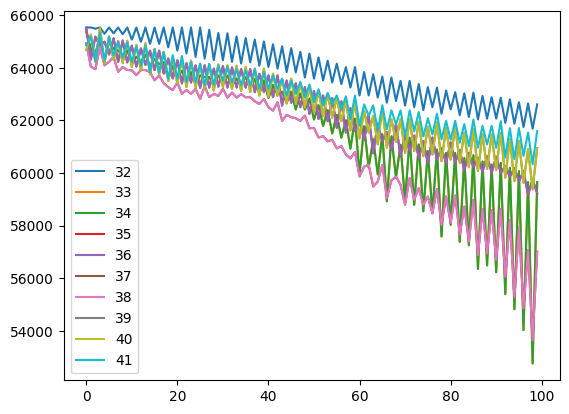

In [27]:
# %matplotlib ipympl
for i in range(32,42):
    plt.plot(ch[i], label=i)
    plt.legend()

# plt.show()

In [28]:
len(ch)

64

In [ ]:
line = 1 #0 - 31. Two channels per line.
t = 1
while(t):
    data = cb.read_fifo(16384)
    
    channel_line_lower = []
    channel_line_upper = []
    for i in range(line,len(data[1]), 32):
        lat_16_bits = data[1][i] & 0xFFFF
        fast_16_bits = data[1][i] >> 16

        # print(lat_16_bits, " ", hex(lat_16_bits))
        channel_line_lower.append(lat_16_bits)
        channel_line_upper.append(fast_16_bits)
        # print(fast_16_bits, " ", hex(fast_16_bits))
    
    t = t - 1
    
x = np.linspace(0, 1, len(channel_line_lower))
y1 = channel_line_lower
y2 = channel_line_upper

plt.plot(y1)
plt.plot(y2)

In [ ]:
from scipy.misc import electrocardiogram
ecg = electrocardiogram()
ecg

In [ ]:
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)

plt.xlabel('Time in s')
plt.ylabel('ECG in mV')
plt.show()

In [ ]:
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)

plt.xlabel('Time in s')
plt.ylabel('ECG in mV')
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

In [ ]:
time = np.arange(ecg.size) / fs
print(np.arange(ecg.size))

In [ ]:
fs = 360
time = np.arange(len(data[1])) / fs
plt.plot(time, data[1])

plt.xlabel('Time in s')
plt.ylabel('ECG in mV')
# plt.xlim(9, 10.2)
# plt.ylim(-1, 1.5)
plt.show()

In [ ]:
as